Prediksi jumlah capaian penanganan sampah untuk tahun 2025: 484986.46 ton
Interval prediksi (5% - 95%): 410689.30 ton - 559277.35 ton


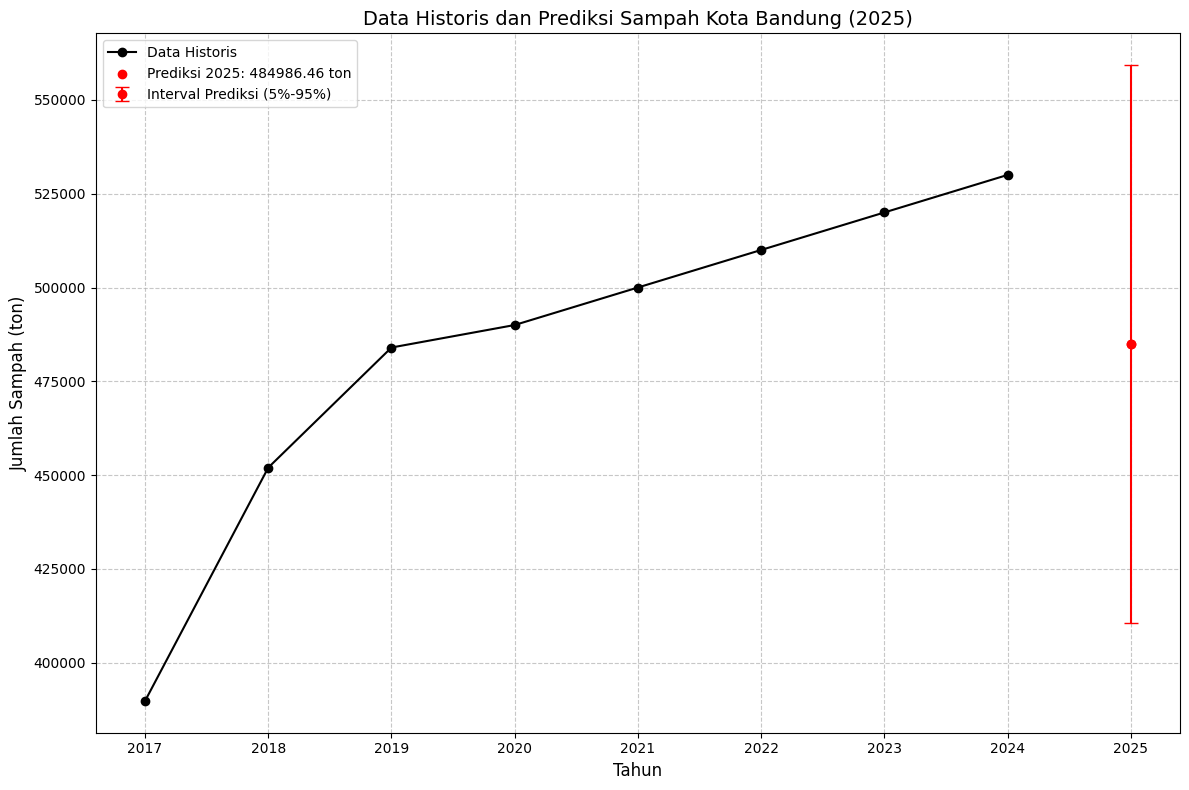

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data historis jumlah capaian penanganan sampah
data = {
    "tahun": [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "jumlah_sampah": [389795, 451988, 484000, 490000, 500000, 510000, 520000, 530000],
}

# Konversi data ke DataFrame
df = pd.DataFrame(data)

# Fungsi untuk melakukan prediksi menggunakan metode Monte Carlo
def monte_carlo_prediction(data, tahun_prediksi, num_simulations=10000):
    """
    Melakukan prediksi capaian penanganan sampah dengan metode Monte Carlo.

    Args:
        data (pd.DataFrame): Data historis jumlah sampah.
        tahun_prediksi (int): Tahun yang akan diprediksi.
        num_simulations (int): Jumlah simulasi Monte Carlo (default: 10,000).

    Returns:
        tuple: Prediksi jumlah sampah, interval prediksi (5%, 95%), dan simulasi.
    """
    try:
        # Hitung rata-rata dan standar deviasi dari data historis
        mean = data['jumlah_sampah'].mean()
        std_dev = data['jumlah_sampah'].std()

        # Simulasi Monte Carlo
        simulated_data = np.random.normal(mean, std_dev, num_simulations)

        # Ambil rata-rata hasil simulasi sebagai prediksi
        prediction = simulated_data.mean()

        # Hitung interval prediksi (5% dan 95%)
        lower_bound = np.percentile(simulated_data, 5)
        upper_bound = np.percentile(simulated_data, 95)

        return prediction, (lower_bound, upper_bound), simulated_data
    except Exception as e:
        print(f"Error dalam prediksi: {e}")
        return None, None, None

# Input tahun yang akan diprediksi
tahun_prediksi = 2025

# Lakukan prediksi
prediksi, interval, simulasi = monte_carlo_prediction(df, tahun_prediksi)

# Output hasil prediksi
print(f"Prediksi jumlah capaian penanganan sampah untuk tahun {tahun_prediksi}: {prediksi:.2f} ton")
print(f"Interval prediksi (5% - 95%): {interval[0]:.2f} ton - {interval[1]:.2f} ton")

# Visualisasi hasil simulasi
plt.figure(figsize=(12, 8))

# Grafik data historis jumlah sampah dari tahun ke tahun
plt.plot(df['tahun'], df['jumlah_sampah'], marker='o', linestyle='-', color='black', label='Data Historis')

# Menambahkan prediksi tahun 2025
plt.scatter([tahun_prediksi], [prediksi], color='red', label=f'Prediksi {tahun_prediksi}: {prediksi:.2f} ton')
plt.errorbar([tahun_prediksi], [prediksi], yerr=[[prediksi - interval[0]], [interval[1] - prediksi]],
             fmt='o', color='red', capsize=5, label='Interval Prediksi (5%-95%)')

# Memberikan judul dan label sumbu
plt.title(f'Data Historis dan Prediksi Sampah Kota Bandung ({tahun_prediksi})', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Sampah (ton)', fontsize=12)

# Menampilkan legenda
plt.legend()

# Grid dan layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Tampilkan grafik
plt.show()



